## Aplicando SVM ao dataset de tipos de vidros

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass.Type = glass.Type.astype('float')

In [4]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 16.8 KB


In [5]:
df = pd.concat([glass.drop('Type', axis=1), pd.get_dummies(glass['Type'])], axis=1)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,1.0,2.0,3.0,5.0,6.0,7.0
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0,0,0,0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0,0,0,0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0,0,0,0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0,0,0,0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0,0,0,0,0


## Explorando o dataset

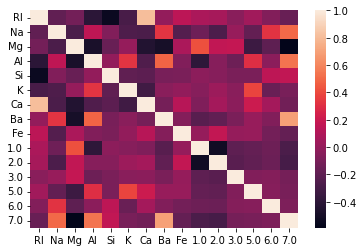

In [6]:
sns.heatmap(df.corr());

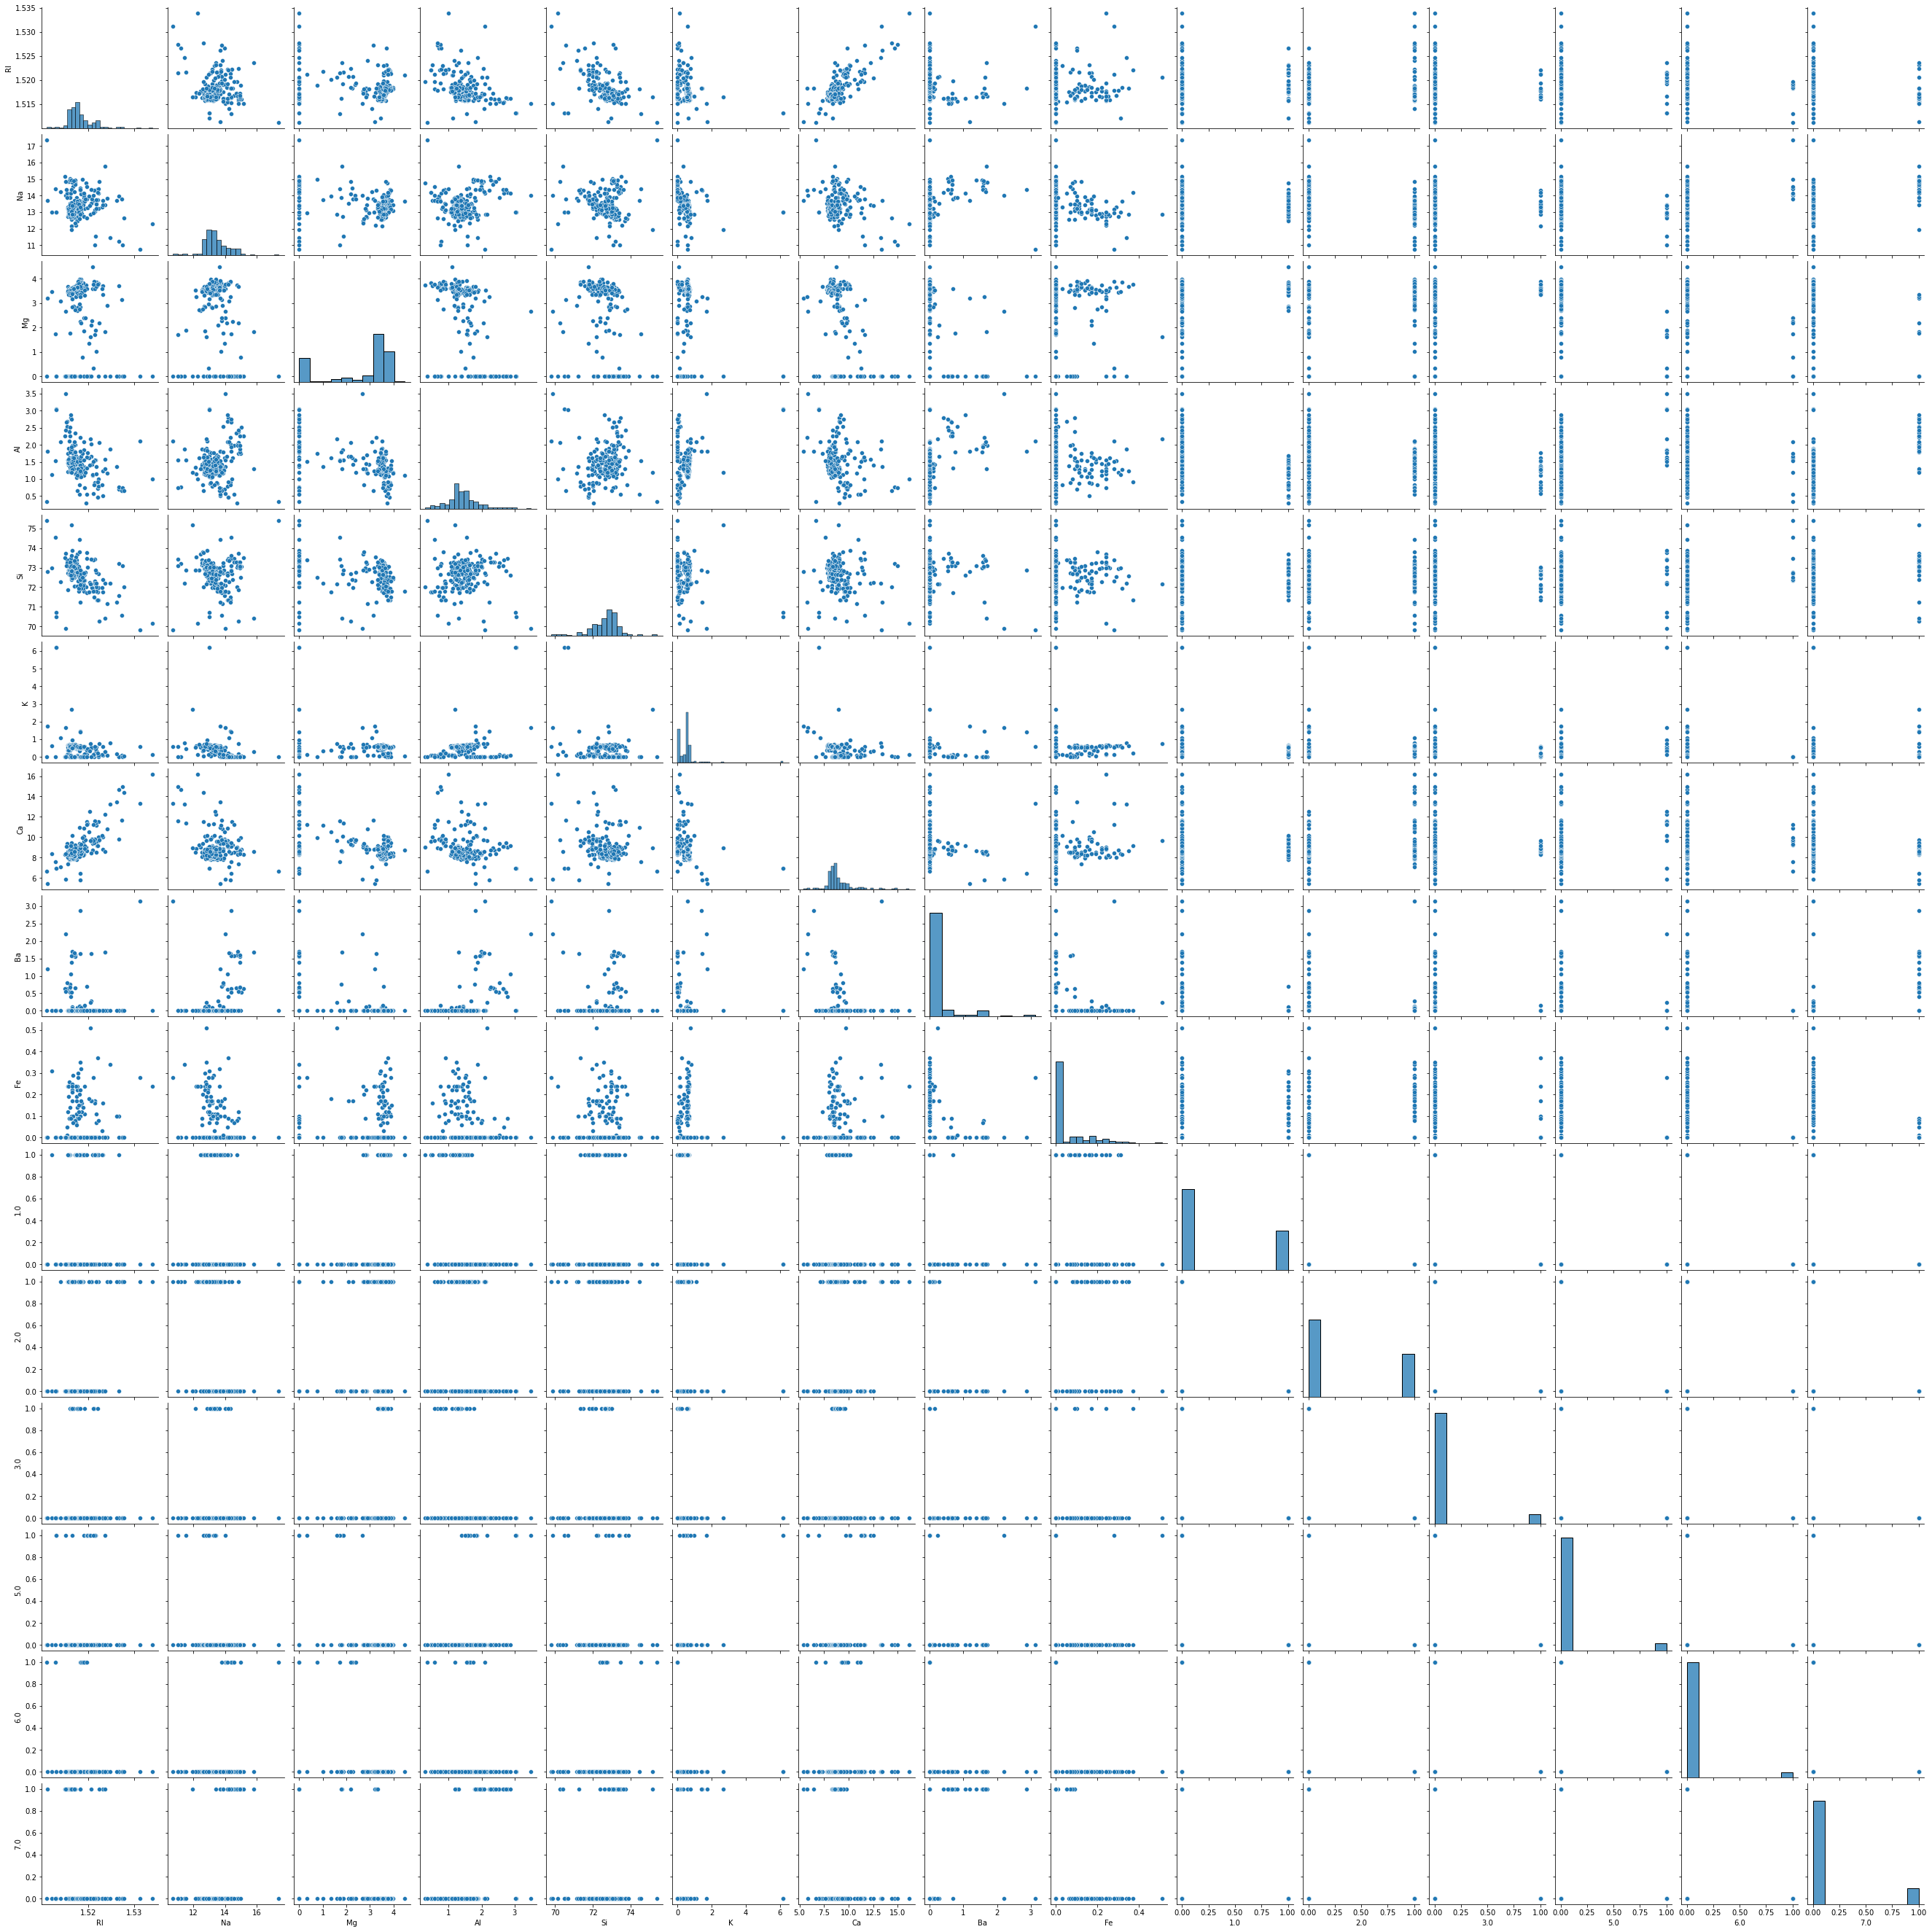

In [7]:
sns.pairplot(df);

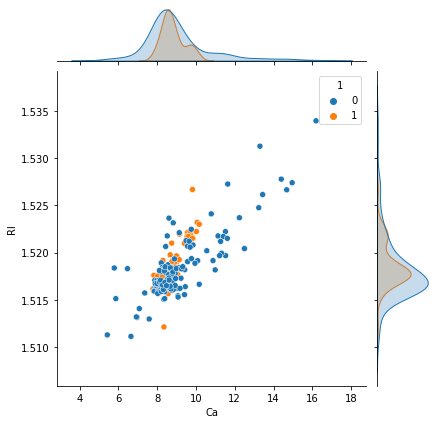

In [8]:
sns.jointplot(x='Ca', y='RI', data=df, hue=1);

## Importando SVM ao dataset pra prever o tipo de vidro

**Sobre o algoritmo:** Cria uma linha ou um plano (caso tenha mais de uma dimensão) para separar classes distintas segundo sua inteligência. A distância entre o item observado e a linha é chamado de margem. Quando existem dados espalhhados (formato circular, por exemplo), é criado uma nova dimensão, plotado um plano que dê para separar os itens, e depois os itens são "realinhados" pra um plano unidimensional

![image](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png)

In [9]:
from sklearn.svm import SVC

In [10]:
clf = SVC(C= 0.5,
         kernel = 'linear',
         random_state = 42)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df[df.columns[:-6]]
X = df.drop(labels= [1.0, 2.0, 3.0, 5.0, 6.0, 7.0], axis=1)
y =  df.iloc[:, -1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [14]:
clf.fit(X_train, y_train)

SVC(C=0.5, kernel='linear', random_state=42)

In [16]:
clf.score(X_train, y_train)

0.9664429530201343

In [17]:
y_pred = clf.predict(X_test)

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.91      1.00      0.95        10

    accuracy                           0.98        65
   macro avg       0.95      0.99      0.97        65
weighted avg       0.99      0.98      0.98        65



## Usando GridSearchCV para encontrar o melhor hiperparâmetro possível

**Sobre os hiperparâmetros:***

In [20]:
from sklearn.model_selection import GridSearchCV

**C:** Diz o comprimento da margem mínima do SVM. Valores baixos de C indicam  uma margem mínima grande, enquanto um valor alto, significa o oposto (Uma margem mínima pequena). Um valor alto basicamente confia mais no dado treinado a custa de overfit, quando um valor baixo diz que a custa de complexo de penalizações em outliers, é aplicado um valor não tão certeiro, porém é dado um valor "médio" bom para previsões como em regressão linear simples.

In [27]:
gscv = GridSearchCV(clf, param_grid= {'kernel': ['linear', 'rbf', 'sigmoid'],
                                      'C': [0.5, 1, 10, 100]},
                    scoring= 'accuracy',
                    cv= 10)

**Kernel:** Tipo de modelo aplicado

**Scoring:** Tipo de métrica da matrix de confusão a ser priorizada

**cv =** ***Cross Validation***: A grosso modo, o dado é dividido em "cv" vezes de maneiras distintas e é performado a aplicação do mesmo algoritmo de ML escolhido cv vezes para cada uma  das repartições criadas, evitando assim o overfiting na hora de treinar

In [28]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(C=0.5, kernel='linear', random_state=42),
             param_grid={'C': [0.5, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [29]:
print(gscv.best_params_)

{'C': 0.5, 'kernel': 'linear'}
